In [3]:
import bapsflib
from bapsflib import lapd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [17]:
%matplotlib notebook

In [4]:
f = lapd.File('/home/phil/Desktop/sweeps/data/09_500G_flat_sweep_vf_correct2.hdf5')

In [72]:
f.overview.report_digitizers()



Digitizer Report
^^^^^^^^^^^^^^^^

SIS crate (main)                                              
+-- adc's:  ('SIS 3302', 'SIS 3305')                          
+-- Configurations Detected (1)                               (1 active, 0 inactive)
|   +-- sweep_and_vf                                          active
|   |   +-- adc's (active):  ('SIS 3302',)                    
|   |   +-- path: /Raw data + config/SIS crate/sweep_and_vf         
|   |   +-- SIS 3302 adc connections                          
|   |   |   |   +-- (brd, [ch, ...])               bit  clock rate   nshotnum  nt        shot ave.  sample ave.
|   |   |   |   +-- (1, (1, 2))                    16   100.0 MHz    3264      100352    None       16
|   |   |   |   +-- (2, (1, 2))                    16   100.0 MHz    3264      65536     None       None


In [6]:
V = f.read_data(2,1)

/home/phil/anaconda2/envs/analysis/lib/python3.6/site-packages/bapsflib/_hdf/utils/hdfreaddata.py:209: UserWarning: Digitizer not specified so assuming the 'main_digitizer' (SIS crate) defined in the mappings.
  warn(why)
/home/phil/anaconda2/envs/analysis/lib/python3.6/site-packages/bapsflib/_hdf/maps/digitizers/siscrate.py:892: UserWarning: `config_name` not specified, assuming 'sweep_and_vf'.
  + config_name + "'.")
/home/phil/anaconda2/envs/analysis/lib/python3.6/site-packages/bapsflib/_hdf/maps/digitizers/siscrate.py:918: UserWarning: No `adc` specified, but only one adc used...assuming adc 'SIS 3302'
  "assuming adc '{}'".format(adc))


In [16]:
I = f.read_data(2,2)

/home/phil/anaconda2/envs/analysis/lib/python3.6/site-packages/bapsflib/_hdf/utils/hdfreaddata.py:209: UserWarning: Digitizer not specified so assuming the 'main_digitizer' (SIS crate) defined in the mappings.
  warn(why)
/home/phil/anaconda2/envs/analysis/lib/python3.6/site-packages/bapsflib/_hdf/maps/digitizers/siscrate.py:892: UserWarning: `config_name` not specified, assuming 'sweep_and_vf'.
  + config_name + "'.")
/home/phil/anaconda2/envs/analysis/lib/python3.6/site-packages/bapsflib/_hdf/maps/digitizers/siscrate.py:918: UserWarning: No `adc` specified, but only one adc used...assuming adc 'SIS 3302'
  "assuming adc '{}'".format(adc))


In [15]:
V['signal'].shape

(3264, 65536)

<IPython.core.display.Javascript object>


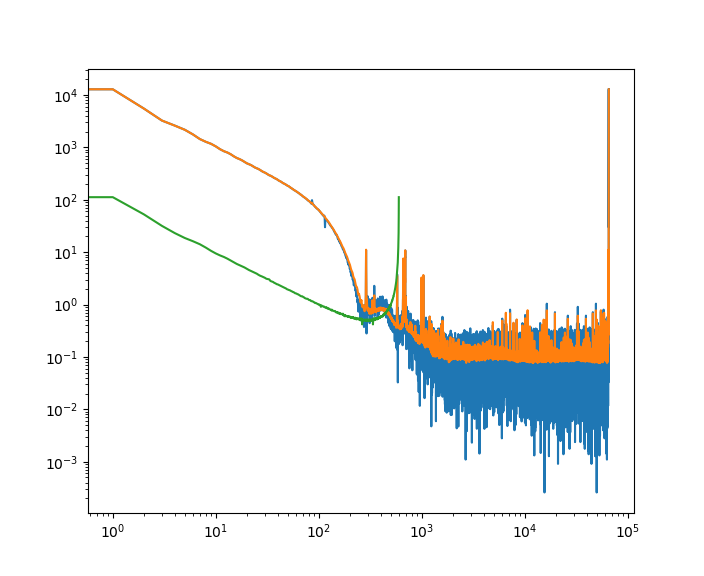

In [106]:
plt.figure()
# plt.loglog(np.linspace(0,3.125e6,65536), np.abs(np.fft.fft(V['signal'][position,:])))
plt.loglog(np.abs(np.fft.fft(V['signal'][64*20,:])))
plt.loglog(np.mean(np.abs(np.fft.fft(V['signal'][64*20:64*21,:])), axis = 0))
plt.loglog(np.abs(np.fft.fft(V['signal'][64*20,0:60000:100])))


In [33]:
V['signal'][position:position+64][0:50000].shape

(64, 65536)

<IPython.core.display.Javascript object>


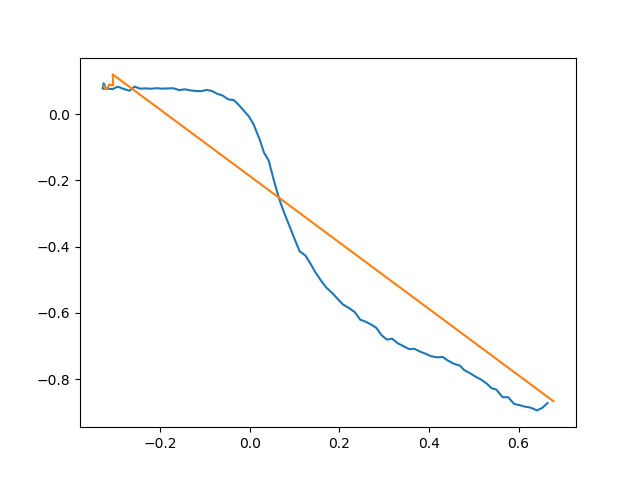

In [108]:
position = 64 * 0 + 4
time = 61000

plt.figure()
plt.plot(V['signal'][position,0:60000:600], I['signal'][position,0:60000:600])
plt.plot(V['signal'][position,60000::600], I['signal'][position,60000::600])

<IPython.core.display.Javascript object>


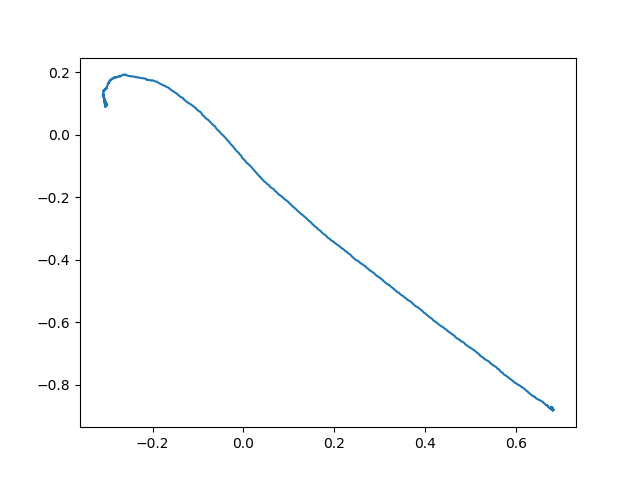

In [43]:
time = 61000
plt.figure()
plt.plot(V['signal'][position,60000:time], I['signal'][position,60000:time])